### Import your librares

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load your dataset

In [2]:
df=pd.read_csv('seattle_weather.csv')
df

DATE  PRCP  TMAX  TMIN   RAIN
0      1948-01-01  0.47    51    42   True
1      1948-01-02  0.59    45    36   True
2      1948-01-03  0.42    45    35   True
3      1948-01-04  0.31    45    34   True
4      1948-01-05  0.17    45    32   True
...           ...   ...   ...   ...    ...
25546  2017-12-10  0.00    49    34  False
25547  2017-12-11  0.00    49    29  False
25548  2017-12-12  0.00    46    32  False
25549  2017-12-13  0.00    48    34  False
25550  2017-12-14  0.00    50    36  False

[25551 rows x 5 columns]

### Handle missing data in PRCP and RAIN columns

In [3]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [4]:
m=df['PRCP'].mean()
df['PRCP'].fillna(m, inplace=True)

In [5]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [6]:
df['RAIN'].fillna(method='ffill', inplace=True)

In [7]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


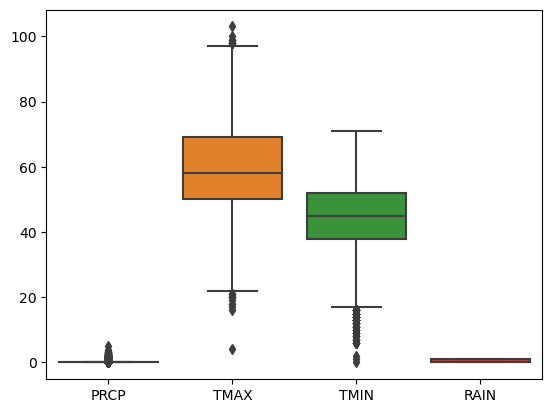

In [9]:
sns.boxplot(data=df);

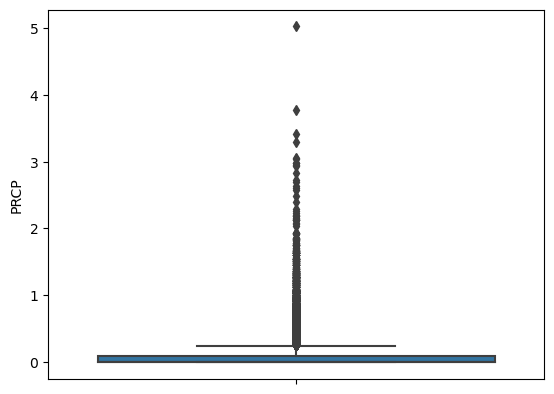

In [10]:
sns.boxplot(data=df, y='PRCP')
plt.show()

In [11]:
Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


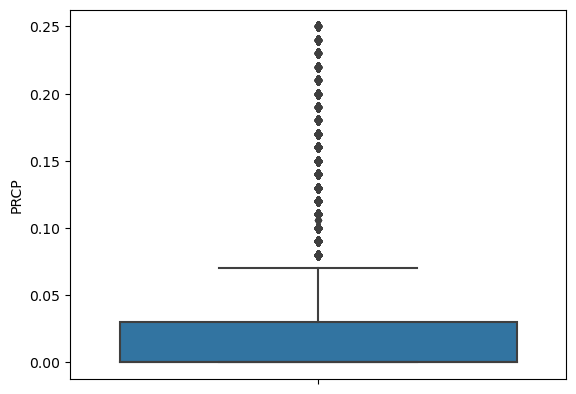

In [12]:
df =df.drop(df[(df['PRCP'] > 0.25) | (df['PRCP'] < -0.15000000000000002)].index)
sns.boxplot(data=df, y=df['PRCP']);

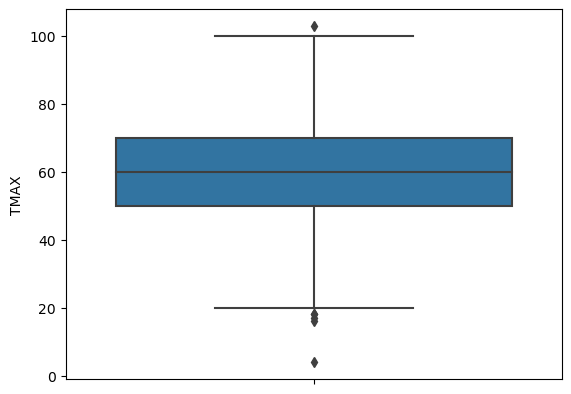

In [13]:
sns.boxplot(data=df, y=df['TMAX']);

In [14]:
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  20.0
higher bound outliers 100.0


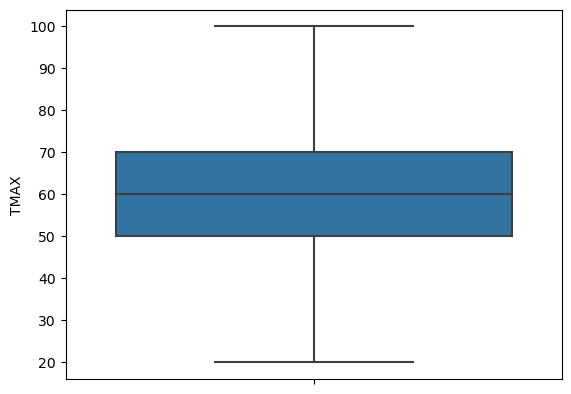

In [15]:
df =df.drop(df[(df['TMAX'] > 100.0) | (df['TMAX'] < 20.0)].index)
sns.boxplot(data=df, y=df['TMAX']);

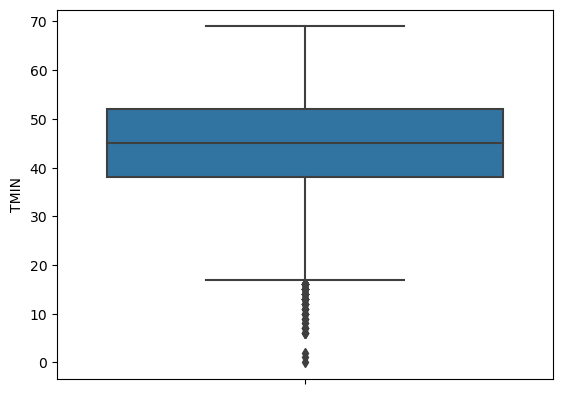

In [16]:
sns.boxplot(data=df, y=df['TMIN']);

In [17]:
Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers 73.0


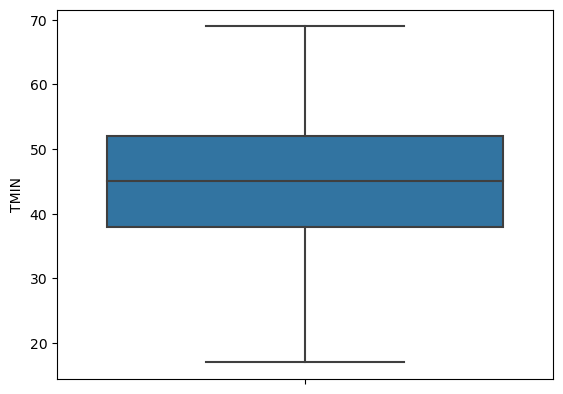

In [18]:
df =df.drop(df[(df['TMIN'] > 73.0) | (df['TMIN'] < 17.0)].index)
sns.boxplot(data=df, y=df['TMIN']);

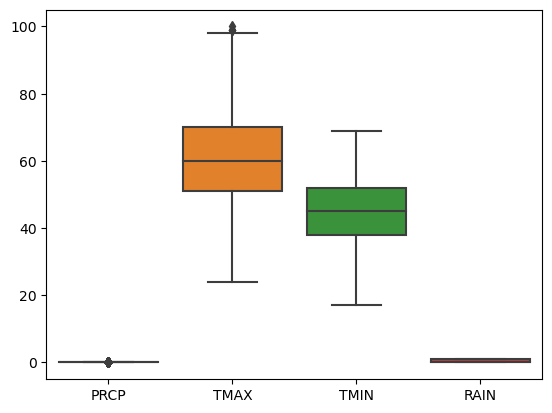

In [19]:
sns.boxplot(data=df);